In [ ]:
! pip install pyphen
! pip install textstat

     |████████████████████████████████| 2.0 MB 4.1 MB/s 
     |████████████████████████████████| 101 kB 3.8 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

import json
from collections import defaultdict
import pyphen
import textstat
import gc
import re

gc.enable()
from IPython.display import clear_output
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from xgboost import XGBRegressor

In [ ]:
#Mount Drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Kaggle/train.csv') 
test = pd.read_csv('/content/drive/MyDrive/Kaggle/test.csv')

In [ ]:
# Calculate numberof syllables per word
dic = pyphen.Pyphen(lang='en')
def getSylabblesperWord(word):
    sylables = dic.inserted(train.excerpt[0]).count("-") - word.count("-")
    return sylables / len(word.split(" "))

In [ ]:
train_pre = train.copy()
train_pre["Syllable_Ratio"] = train_pre["excerpt"].apply(getSylabblesperWord)

In [ ]:
test["Syllable_Ratio"] = test["excerpt"].apply(getSylabblesperWord)

In [ ]:
def get_readability_scores(df):
    
    flesch_score = []
    smog_index = []
    flesch_kincaid = []
    coleman_liau = []
    automated_readability = []
    dale_chall_readability = []
    difficult_w_ratio = []
    linsear = []
    gunning_fog = []
    text_standard = []
    fernandez_huerta = []
    szigriszt_pazos = []
    gutierrez_polini = []
    crawford = []
       
    
    
    for sent in tqdm(df["excerpt"]):
        sent_len = len(sent.split(" "))
        
        
        flesch_score.append(textstat.flesch_reading_ease(sent))
        smog_index.append(textstat.smog_index(sent))
        flesch_kincaid.append(textstat.flesch_kincaid_grade(sent))
        coleman_liau.append(textstat.coleman_liau_index(sent))
        automated_readability.append(textstat.automated_readability_index(sent))
        dale_chall_readability.append(textstat.dale_chall_readability_score(sent))
        difficult_w_ratio.append(textstat.difficult_words(sent)/sent_len)
        linsear.append(textstat.linsear_write_formula(sent))
        gunning_fog.append(textstat.gunning_fog(sent))
        text_standard.append(textstat.text_standard(sent))
        fernandez_huerta.append(textstat.fernandez_huerta(sent))
        szigriszt_pazos.append(textstat.szigriszt_pazos(sent))
        gutierrez_polini.append(textstat.gutierrez_polini(sent))
        crawford.append(textstat.crawford(sent))
        
    
    flesch_score = np.array(flesch_score)
    smog_index = np.array(smog_index)
    flesch_kincaid = np.array(flesch_kincaid)
    coleman_liau = np.array(coleman_liau)
    automated_readability = np.array(automated_readability)
    dale_chall_readability = np.array(dale_chall_readability)
    difficult_w_ratio = np.array(difficult_w_ratio)
    linsear = np.array(linsear)
    gunning_fog = np.array(gunning_fog)
    text_standard = np.array(text_standard)
    fernandez_huerta = np.array(fernandez_huerta)
    szigriszt_pazos = np.array(szigriszt_pazos)
    gutierrez_polini = np.array(gutierrez_polini)
    crawford = np.array(crawford)
       
    
    return (flesch_score, smog_index, flesch_kincaid, coleman_liau, automated_readability, dale_chall_readability, 
            difficult_w_ratio, linsear, gunning_fog, text_standard, fernandez_huerta, szigriszt_pazos, gutierrez_polini,
            crawford)

In [ ]:
(flesch_score, smog_index, flesch_kincaid, coleman_liau, automated_readability, dale_chall_readability, 
            difficult_w_ratio, linsear, gunning_fog, text_standard, fernandez_huerta, szigriszt_pazos, gutierrez_polini,
            crawford) = get_readability_scores(train_pre)

100%|██████████| 2834/2834 [00:07<00:00, 385.15it/s]


In [ ]:
train_pre["flesch_score"] = flesch_score
train_pre["smog_index"] = smog_index
train_pre["flesch_kincaid"] = flesch_kincaid
train_pre["coleman_liau"] = coleman_liau
train_pre["automated_readability"] = automated_readability
train_pre["dale_chall_readability"] = dale_chall_readability
train_pre["difficult_w_ratio"] = difficult_w_ratio
train_pre["linsear"] = linsear
train_pre["gunning_fog"] = gunning_fog
train_pre["text_standard"] = text_standard
train_pre["fernandez_huerta"] = fernandez_huerta
train_pre["szigriszt_pazos"] = szigriszt_pazos
train_pre["gutierrez_polini"] = gutierrez_polini
train_pre["crawford"] = crawford

train_pre['word_count'] = train_pre['excerpt'].apply(lambda x: len(re.findall('[A-z]+', x))) # Number of words 
train_pre['sen_count'] = train_pre['excerpt'].apply(lambda x: len(re.findall('\.', x)) +len(re.findall('\?', x)) +len(re.findall('\!', x))) # Number of sentances 
train_pre['words_per_sen'] = train_pre['word_count']/train_pre['sen_count'] # Words Per Sentance
train_pre['chars'] = train_pre['excerpt'].apply(lambda x: len(re.findall('[A-z]', x))) # Number of Characters 
train_pre['chars_per_word'] = train_pre['chars']/train_pre['word_count'] # Number of Characters Per Word

In [ ]:
(flesch_score, smog_index, flesch_kincaid, coleman_liau, automated_readability, dale_chall_readability, 
            difficult_w_ratio, linsear, gunning_fog, text_standard, fernandez_huerta, szigriszt_pazos, gutierrez_polini,
            crawford) = get_readability_scores(test)

100%|██████████| 7/7 [00:00<00:00, 231.60it/s]


In [ ]:
test["flesch_score"] = flesch_score
test["smog_index"] = smog_index
test["flesch_kincaid"] = flesch_kincaid
test["coleman_liau"] = coleman_liau
test["automated_readability"] = automated_readability
test["dale_chall_readability"] = dale_chall_readability
test["difficult_w_ratio"] = difficult_w_ratio
test["linsear"] = linsear
test["gunning_fog"] = gunning_fog
test["text_standard"] = text_standard
test["fernandez_huerta"] = fernandez_huerta
test["szigriszt_pazos"] = szigriszt_pazos
test["gutierrez_polini"] = gutierrez_polini
test["crawford"] = crawford

test['word_count'] = test['excerpt'].apply(lambda x: len(re.findall('[A-z]+', x))) # Number of words 
test['sen_count'] = test['excerpt'].apply(lambda x: len(re.findall('\.', x)) +len(re.findall('\?', x)) +len(re.findall('\!', x))) # Number of sentances 
test['words_per_sen'] = test['word_count']/train_pre['sen_count'] # Words Per Sentance
test['chars'] = test['excerpt'].apply(lambda x: len(re.findall('[A-z]', x))) # Number of Characters 
test['chars_per_word'] = test['chars']/train_pre['word_count'] # Number of Characters Per Word

In [ ]:
train_pre.head()

,id,url_legal,license,excerpt,target,standard_error,Syllable_Ratio,flesch_score,smog_index,flesch_kincaid,coleman_liau,automated_readability,dale_chall_readability,difficult_w_ratio,linsear,gunning_fog,text_standard,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford,word_count,sen_count,words_per_sen,chars,chars_per_word
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,0.551724,80.31,8.6,6.1,8.06,8.3,7.80,0.143678,9.000000,8.31,8th and 9th grade,112.2,112.25,46.59,1.5,181,11,16.454545,787,4.348066
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,0.597561,82.54,8.3,5.2,6.78,7.2,6.48,0.103659,7.285714,7.53,7th and 8th grade,114.5,110.91,49.06,1.6,172,17,10.117647,713,4.145349
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,0.592593,75.74,10.1,7.9,7.20,10.1,7.33,0.104938,14.750000,10.49,7th and 8th grade,107.6,107.65,47.03,1.8,172,12,14.333333,696,4.046512
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,0.582822,72.02,6.7,11.4,8.54,16.4,8.34,0.085890,12.500000,13.61,6th and 7th grade,101.4,99.58,41.49,1.8,167,5,33.400000,713,4.269461
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,0.639456,75.47,8.8,10.0,4.83,11.8,1.89,0.006803,13.500000,11.76,11th and 12th grade,104.9,105.39,48.95,1.6,151,5,30.200000,545,3.609272


In [ ]:
train_pre = train_pre.fillna('0')

In [ ]:
test = test.fillna('0')

In [ ]:
train_pre['url'] = train_pre['url_legal'].apply(lambda x: 1 if x != '0' else 0)
train_pre['license_new'] = train_pre['license'].apply(lambda x: 1 if x != '0' else 0)

In [ ]:
test['url'] = test['url_legal'].apply(lambda x: 1 if x != '0' else 0)
test['license_new'] = test['license'].apply(lambda x: 1 if x != '0' else 0)

In [ ]:
train_pre['standard'] = train_pre['text_standard'].apply(lambda x: int(re.findall('[1-9]+', x)[0]))

In [ ]:
test['standard'] = test['text_standard'].apply(lambda x: int(re.findall('[1-9]+', x)[0]))

In [ ]:
train_pre.head()

,id,url_legal,license,excerpt,target,standard_error,Syllable_Ratio,flesch_score,smog_index,flesch_kincaid,coleman_liau,automated_readability,dale_chall_readability,difficult_w_ratio,linsear,gunning_fog,text_standard,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford,word_count,sen_count,words_per_sen,chars,chars_per_word,url,license_new,standard
0,c12129c31,0,0,When the young people returned to the ballroom...,-0.340259,0.464009,0.551724,80.31,8.6,6.1,8.06,8.3,7.80,0.143678,9.000000,8.31,8th and 9th grade,112.2,112.25,46.59,1.5,181,11,16.454545,787,4.348066,0,0,8
1,85aa80a4c,0,0,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,0.597561,82.54,8.3,5.2,6.78,7.2,6.48,0.103659,7.285714,7.53,7th and 8th grade,114.5,110.91,49.06,1.6,172,17,10.117647,713,4.145349,0,0,7
2,b69ac6792,0,0,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,0.592593,75.74,10.1,7.9,7.20,10.1,7.33,0.104938,14.750000,10.49,7th and 8th grade,107.6,107.65,47.03,1.8,172,12,14.333333,696,4.046512,0,0,7
3,dd1000b26,0,0,And outside before the palace a great garden w...,-1.054013,0.450007,0.582822,72.02,6.7,11.4,8.54,16.4,8.34,0.085890,12.500000,13.61,6th and 7th grade,101.4,99.58,41.49,1.8,167,5,33.400000,713,4.269461,0,0,6
4,37c1b32fb,0,0,Once upon a time there were Three Bears who li...,0.247197,0.510845,0.639456,75.47,8.8,10.0,4.83,11.8,1.89,0.006803,13.500000,11.76,11th and 12th grade,104.9,105.39,48.95,1.6,151,5,30.200000,545,3.609272,0,0,11


In [ ]:
test.head()

,id,url_legal,license,excerpt,Syllable_Ratio,flesch_score,smog_index,flesch_kincaid,coleman_liau,automated_readability,dale_chall_readability,difficult_w_ratio,linsear,gunning_fog,text_standard,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford,word_count,sen_count,words_per_sen,chars,chars_per_word,url,license_new,standard
0,c0f722661,0,0,My hope lay in Jack's promise that he would ke...,0.666667,71.68,8.8,9.4,6.62,10.8,6.88,0.088435,11.000000,10.99,10th and 11th grade,103.6,100.05,46.99,2.2,150,8,13.636364,605,3.342541,0,0,1
1,f0953f0a5,0,0,Dotty continued to go to Mrs. Gray's every nig...,0.541899,88.57,5.6,5.0,6.55,7.3,6.29,0.061453,6.428571,6.82,6th and 7th grade,118.0,116.72,49.09,1.1,185,12,10.882353,751,4.366279,0,0,6
2,0df072751,0,0,It was a bright and cheerful scene that greete...,0.583333,80.04,9.2,8.3,7.61,12.1,7.87,0.125000,14.000000,10.88,7th and 8th grade,109.5,104.28,45.41,1.9,178,13,14.833333,731,4.250000,0,0,7
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...,0.547486,26.48,19.3,18.5,13.70,21.9,9.90,0.262570,17.250000,20.40,18th and 19th grade,68.1,63.19,31.78,4.5,180,7,36.000000,940,5.628743,1,1,18
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...,0.586826,34.60,17.7,15.4,13.93,18.6,11.60,0.317365,15.200000,17.87,17th and 18th grade,76.3,72.41,33.72,4.2,167,6,33.400000,886,5.867550,1,1,17


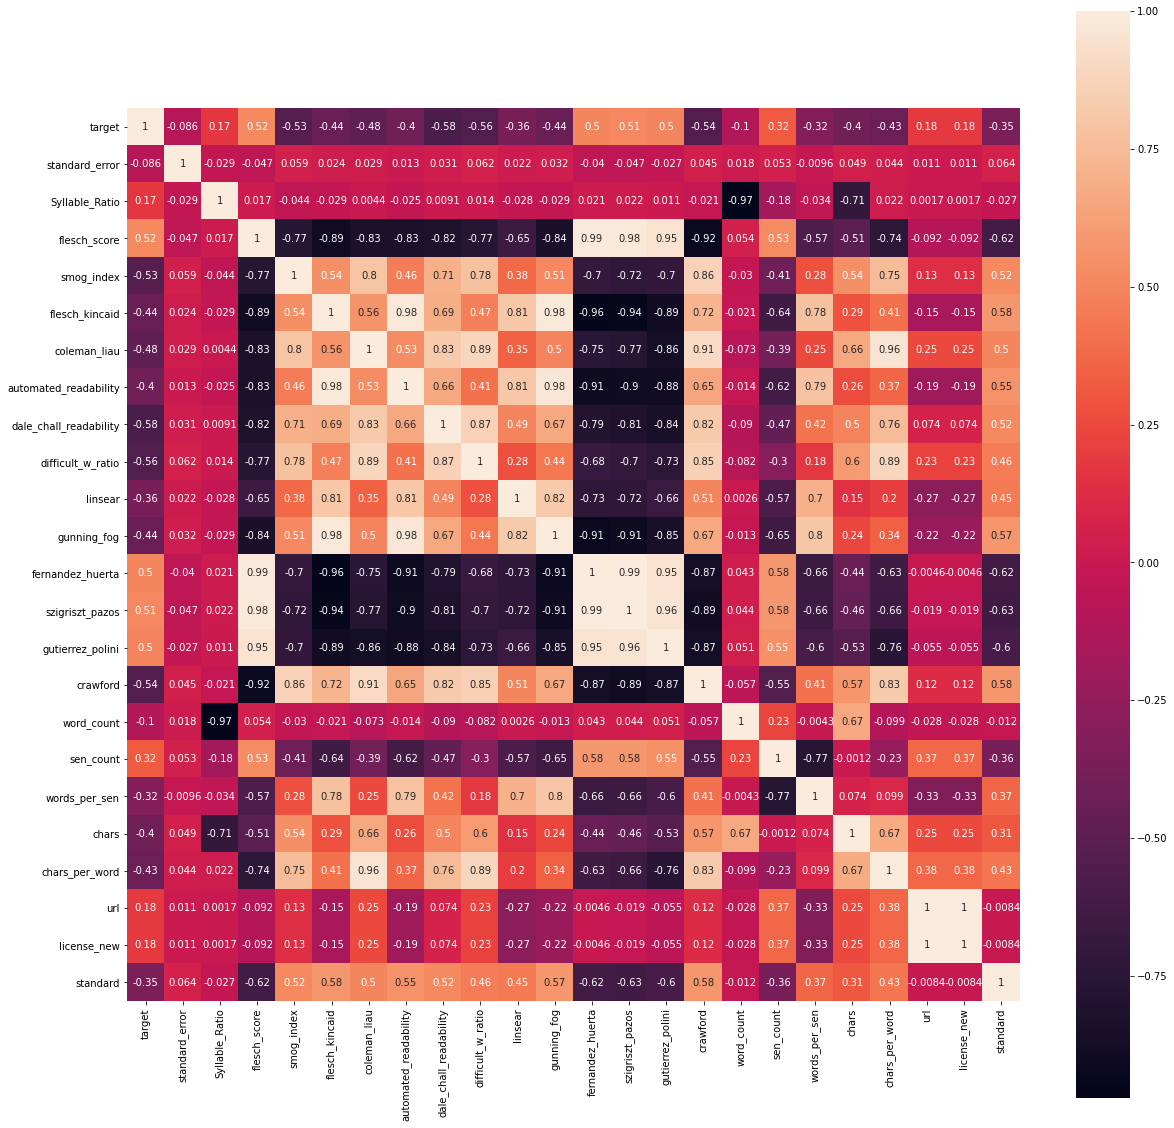

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train_pre.corr(), annot = True, square=True)

In [ ]:
# This data will be used later on to train final model  
X = train_pre.drop(['url_legal', 'url', 'license', 'id', 'target', 'flesch_score', 'gunning_fog', 'fernandez_huerta', 'gutierrez_polini', 'text_standard', 'excerpt', 'standard_error', 'Syllable_Ratio', 'sen_count', 'chars', 'word_count'],  axis='columns')
y = train_pre['target']

In [ ]:
#poly = PolynomialFeatures(2)
#X = poly.fit_transform(X)

In [ ]:
test_X = test.drop(['url_legal', 'url', 'license', 'id', 'flesch_score', 'gunning_fog', 'fernandez_huerta', 'gutierrez_polini', 'text_standard', 'excerpt', 'Syllable_Ratio', 'sen_count', 'chars', 'word_count'],  axis='columns')

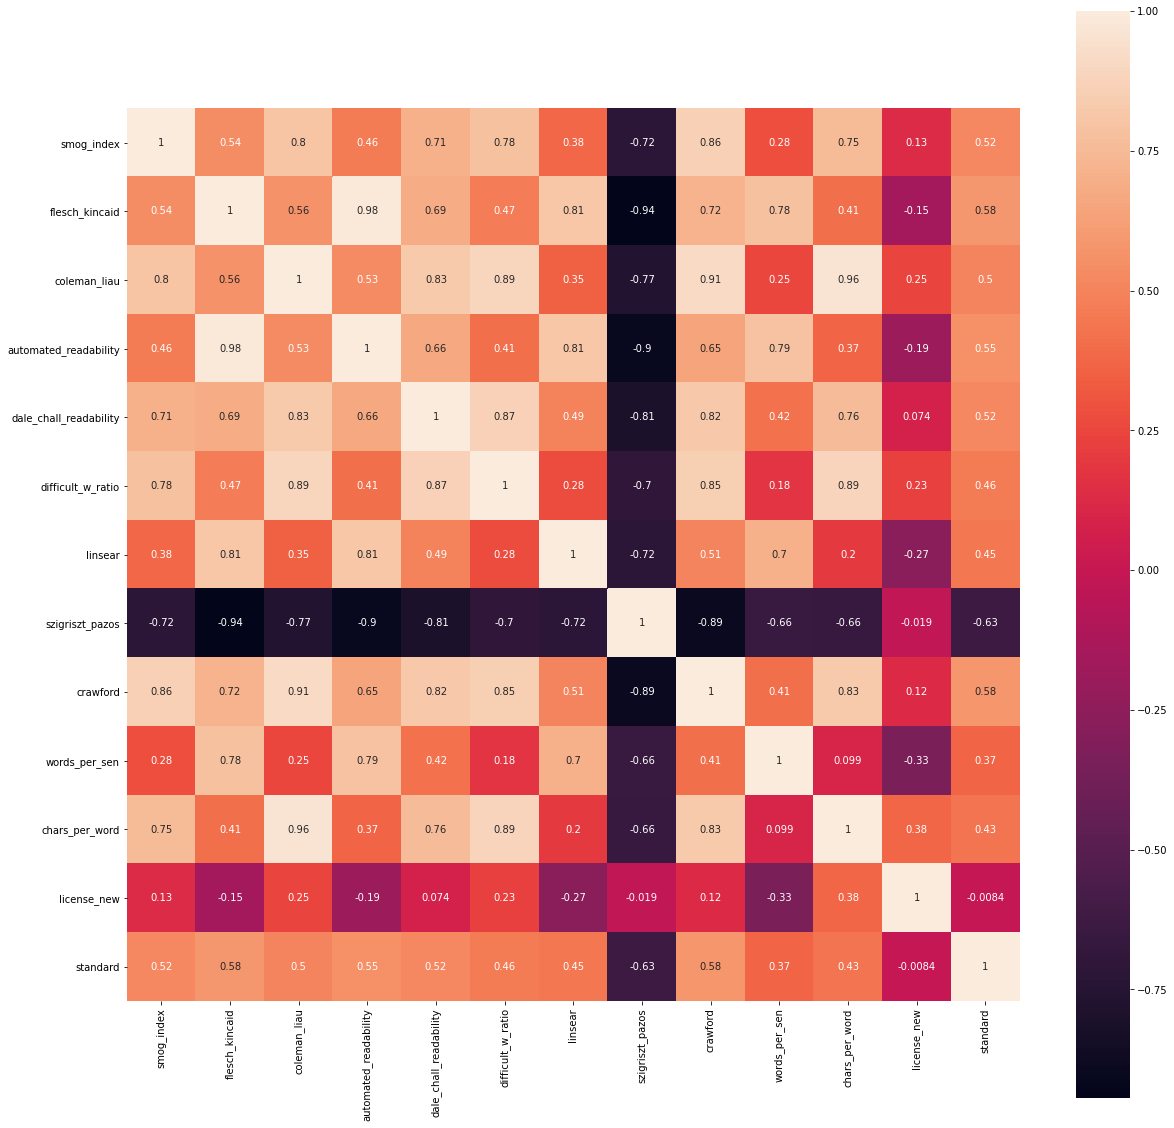

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), annot = True, square=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler()
sc_test = StandardScaler()  # I am using two different scalers for training and testing data to avoid bias in the model 
X_train = sc_train.fit_transform(X_train)
X_test = sc_test.fit_transform(X_test)

0.49164905677257886


Text(0, 0.5, 'Predicted Value')

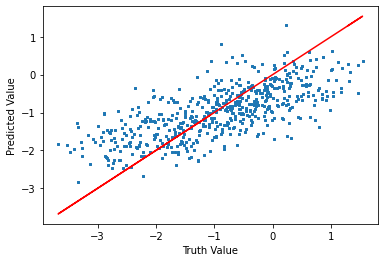

In [ ]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train,y_train)

print(model_1.score(X_test,y_test))

y_predicted = model_1.predict(X_test)
plt.scatter(y_test, y_predicted, alpha=1, s=2**2, marker=r's')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Truth Value')
plt.ylabel('Predicted Value')

0.03465889992714255


Text(0, 0.5, 'Predicted Value')

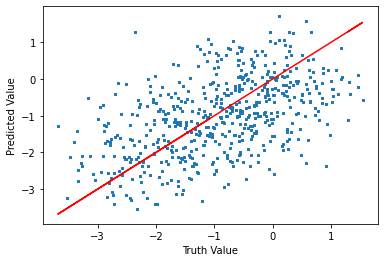

In [ ]:
from sklearn import tree 
model_6 = tree.DecisionTreeRegressor()
model_6.fit(X_train, y_train)

print(model_6.score(X_test, y_test))

y_predicted = model_6.predict(X_test)
plt.scatter(y_test, y_predicted, alpha=1, s=2**2, marker=r's')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Truth Value')
plt.ylabel('Predicted Value')

0.471810960981921


Text(0, 0.5, 'Predicted Value')

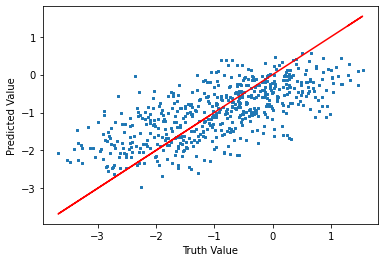

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)

print(model_2.score(X_test, y_test))

y_predicted = model_2.predict(X_test)
plt.scatter(y_test, y_predicted, alpha=1, s=2**2, marker=r's')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Truth Value')
plt.ylabel('Predicted Value')

0.5166785112438971 



Text(0, 0.5, 'Predicted Value')

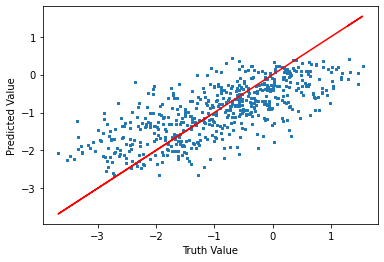

In [ ]:
from sklearn.svm import SVR

model_4 = SVR()
model_4.fit(X_train,y_train)

print(model_4.score(X_test,y_test), '\n')

y_predicted = model_4.predict(X_test)
plt.scatter(y_test, y_predicted, alpha=1, s=2**2, marker=r's')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Truth Value')
plt.ylabel('Predicted Value')

[09:40:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.37670425615961234 



Text(0, 0.5, 'Predicted Value')

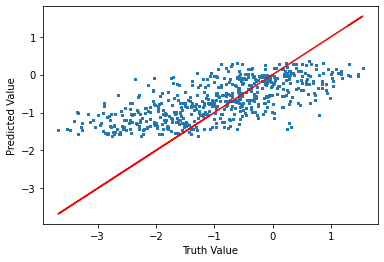

In [ ]:
xgb_r = XGBRegressor( n_estimators = 15)
xgb_r.fit(X_train, y_train)

print(xgb_r.score(X_test,y_test), '\n')

y_predicted = xgb_r.predict(X_test)
plt.scatter(y_test, y_predicted, alpha=1, s=2**2, marker=r's')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Truth Value')
plt.ylabel('Predicted Value')